In [1]:
!pip install -q rasterio

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [2]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Lendo imagem como array
src = rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif')
b1 = src.read(1)
b2 = src.read(2)
b3 = src.read(3)
b4 = src.read(4)
b5 = src.read(5)
b7 = src.read(6)

img = np.dstack([b1,b2,b3,b4,b5,b7])

In [4]:
# Armazenando metadados
meta = src.profile

In [5]:
# Lendo classes
with rio.open('/content/drive/MyDrive/Curso PDI com Python/roi.tif') as src2:
  roi = src2.read(1)

In [6]:
# Criando conjunto de treino
X = img[roi > 0]
y  = roi[roi > 0]

In [12]:
# Dividindo conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), 
                                                    test_size = 0.3)

In [ ]:
# Instanciando
rf = RandomForestClassifier(n_estimators= 500, max_depth=1000, n_jobs=-1, 
                            oob_score=True)

rf.fit(X_train, y_train)

In [15]:
# Criando matriz com bandas em colunas
img2d = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

# Rodando predição
pred_rf = rf.predict(img2d)

# Retornando para o formato original
pred_rf_final = pred_rf.reshape(img[:,:,0].shape)

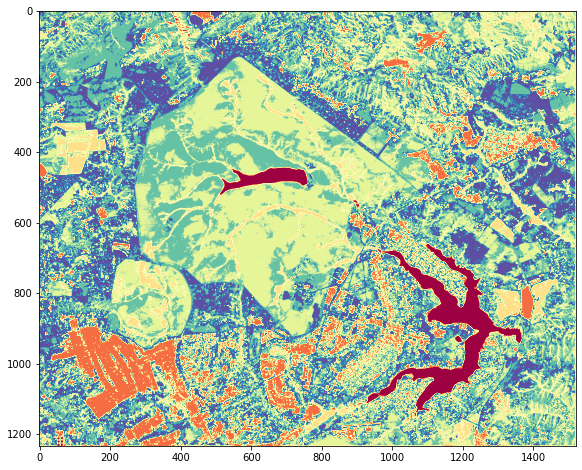

In [16]:
# Visualizando
plt.figure(figsize=(12,8))
plt.imshow(pred_rf_final, cmap='Spectral')

In [17]:
rf.feature_importances_

array([0.12639986, 0.19672591, 0.23834406, 0.08674645, 0.15255218,
       0.19923153])